# Vehicle Insurance Customer Profile

A Customer Profile is a detailed description of a business's ideal customer, helping companies understand who their target audience is, what their needs are, and how to better serve them. A customer profile typically includes the following aspects:

1. **Demographic Information**: Age, gender, income, occupation, education level, marital status, etc.
2. **Geographic Information**: The region, city, or country where the customer is located.
3. **Psychographic Characteristics**: Interests, lifestyle, values, personality traits, etc.
4. **Behavioral Characteristics**: Purchasing habits, brand loyalty, frequency of using products or services, factors influencing buying decisions, etc.
5. **Needs and Pain Points**: The challenges or problems customers face in a specific area and what they hope to solve through a product or service.
6. **Buying Motivations**: The primary reasons driving customers to purchase a product or service, such as price, quality, brand reputation, etc.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the version warning
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
input_file_path = './Resource/Vehiclw_insurance_data.csv'

raw_data = pd.read_csv(input_file_path, encoding='utf_8', index_col=0)
raw_data.head()

,Age,Gender,Marital,exp,Owner,vAge,Garage,AntiTFD,import,Loss
EngSize,,,,,,,,,,
2.0,56,M,married,20,company,10,Y,Y,Imported,0.0
1.8,41,M,married,20,company,9,Y,N,Domestic,0.0
2.0,44,M,unmarried,20,company,8,Y,Y,Domestic,0.0
1.6,56,M,married,20,company,7,Y,Y,Domestic,0.0
1.8,45,M,married,20,company,7,N,N,Domestic,0.0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4233 entries, 2.0 to 2.4
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      4233 non-null   int64  
 1   Gender   4233 non-null   object 
 2   Marital  4233 non-null   object 
 3   exp      4233 non-null   int64  
 4   Owner    4233 non-null   object 
 5   vAge     4233 non-null   int64  
 6   Garage   4233 non-null   object 
 7   AntiTFD  4233 non-null   object 
 8   import   4233 non-null   object 
 9   Loss     4233 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 363.8+ KB


In [4]:
# Data Preparation
data_df = raw_data.copy()

In [7]:
# Recode based on the Loss values, where values greater than 0 are encoded as 1, values less than 0 are encoded as 0, and name this column LOSS_FLAG.
data_df['Loss_Flag'] = (
    data_df['Loss']
    .apply(lambda x: 1 if x > 0 else 0)
)

data_df

,Age,Gender,Marital,exp,Owner,vAge,Garage,AntiTFD,import,Loss,Loss_Flag
EngSize,,,,,,,,,,,
2.0,56,M,married,20,company,10,Y,Y,Imported,0.0,0
1.8,41,M,married,20,company,9,Y,N,Domestic,0.0,0
2.0,44,M,unmarried,20,company,8,Y,Y,Domestic,0.0,0
1.6,56,M,married,20,company,7,Y,Y,Domestic,0.0,0
1.8,45,M,married,20,company,7,N,N,Domestic,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1.8,22,F,unmarried,0,personal,1,Y,Y,Domestic,976.0,1
2.5,22,M,unmarried,0,personal,1,Y,N,Imported,855.6,1
1.8,21,M,unmarried,0,personal,1,Y,N,Domestic,0.0,0


In [8]:
# Calculate the count number of loss_flag
loss_flag_cnt = data_df['Loss_Flag'].value_counts()
loss_flag_cnt

Loss_Flag
0    3028
1    1205
Name: count, dtype: int64

In [9]:
loss_flag_percent = data_df['Loss_Flag'].value_counts() / data_df['Loss'].count()
loss_flag_percent

Loss_Flag
0    0.715332
1    0.284668
Name: count, dtype: float64

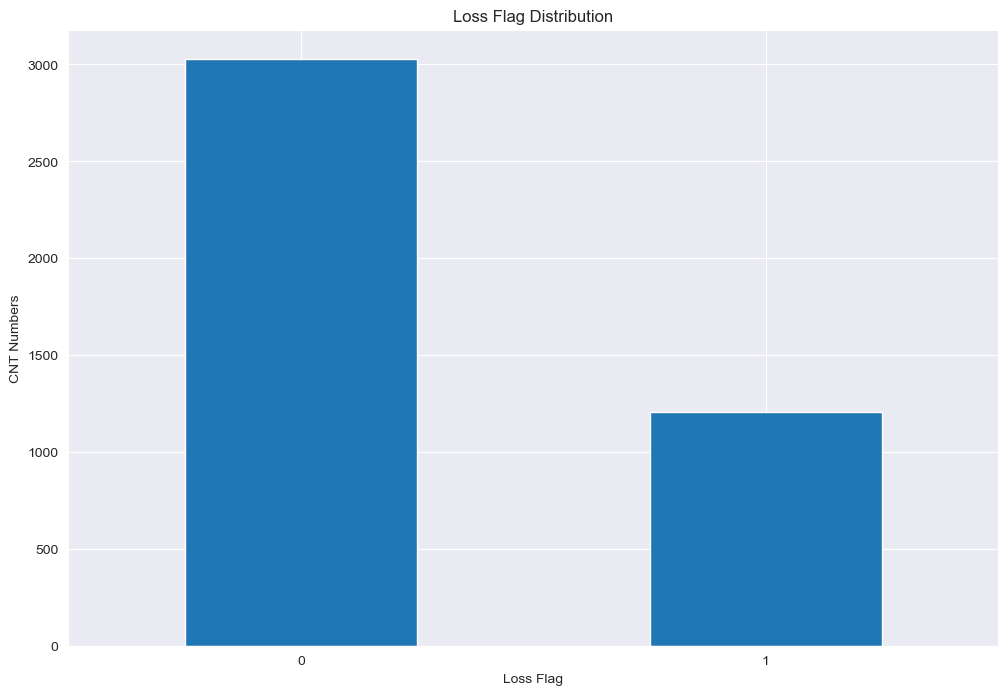

In [18]:
# Plot the result with Bar chart
plt.figure(figsize=(12, 8))
loss_flag_cnt.plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Loss Flag')
plt.ylabel('CNT Numbers')
plt.title('Loss Flag Distribution')
plt.savefig('./Outputs/Loss Flag Distribution.png')
plt.show()

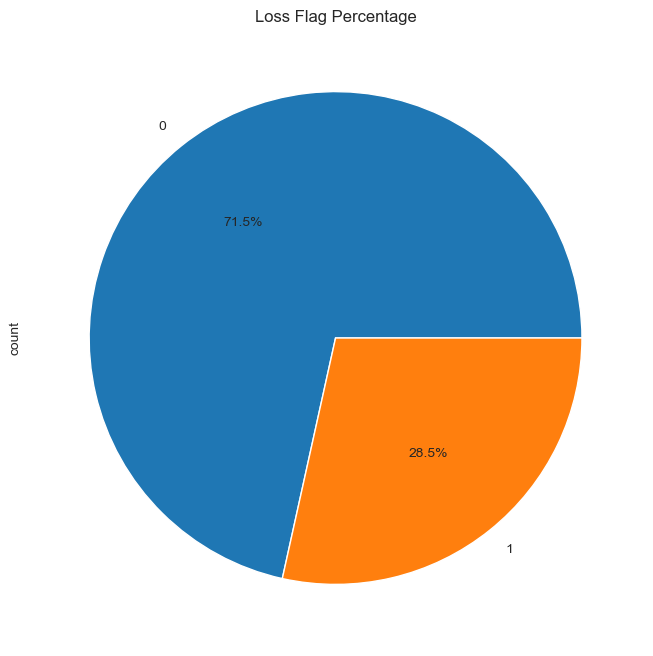

In [19]:
# Plot the result with Bar chart
plt.figure(figsize=(12, 8))
loss_flag_percent.plot(kind='pie', autopct='%1.1f%%')

plt.title('Loss Flag Percentage')
plt.savefig('./Outputs/Loss Flag Percentage.png')
plt.show()

# Description Analysis

# Discovers the relationship between Loss_flag and other factors


## plot the chart between loss_flag and age or experience
- Loss_flag: Catagorical Variable
- Age: Continuous Variale
- Plot: Box Plot

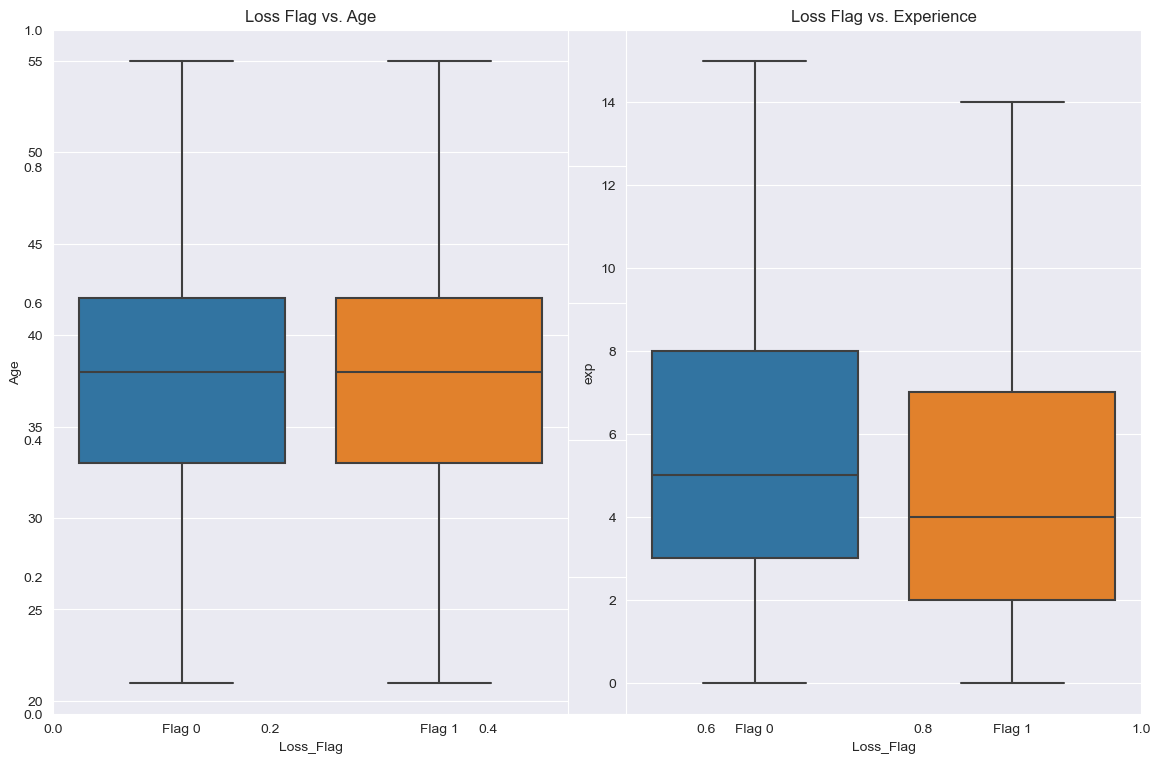

In [31]:
# Create the figure and subplots
fig, ax = plt.subplots(figsize=(12, 8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Build the chart
sns.boxplot(data=data_df, x='Loss_Flag', y='Age', ax=ax1, showfliers=False)
sns.boxplot(data=data_df, x='Loss_Flag', y='exp', ax=ax2, showfliers=False)

# Set titles for each subplot
ax1.set_title('Loss Flag vs. Age')
ax2.set_title('Loss Flag vs. Experience')

# Set proper categorical labels for Loss_Flag
ax1.set_xticklabels(['Flag 0', 'Flag 1'])
ax2.set_xticklabels(['Flag 0', 'Flag 1'])

# plt.xticks(rotation=0) 
plt.tight_layout()
plt.savefig('./Outputs/Loss Flag VS. Age_Experience Box Plot.png')
plt.show()

### Observation and Analysis:

This image displays two side-by-side box plots, showing the distribution of different variables (age on the left, experience on the right), as well as the two categories of the `Loss_Flag` variable (0 and 1).

- The left chart indicates that there are no significant differences in claims among different age groups.
- The right chart shows that claimants have a shorter median driving experience.

# Plot the relationship between loss flag and marital status
- loss flag Catagorical varialbe
- marital status: Categorical variale
- Plot Stacked Bar chart or Bar Chart

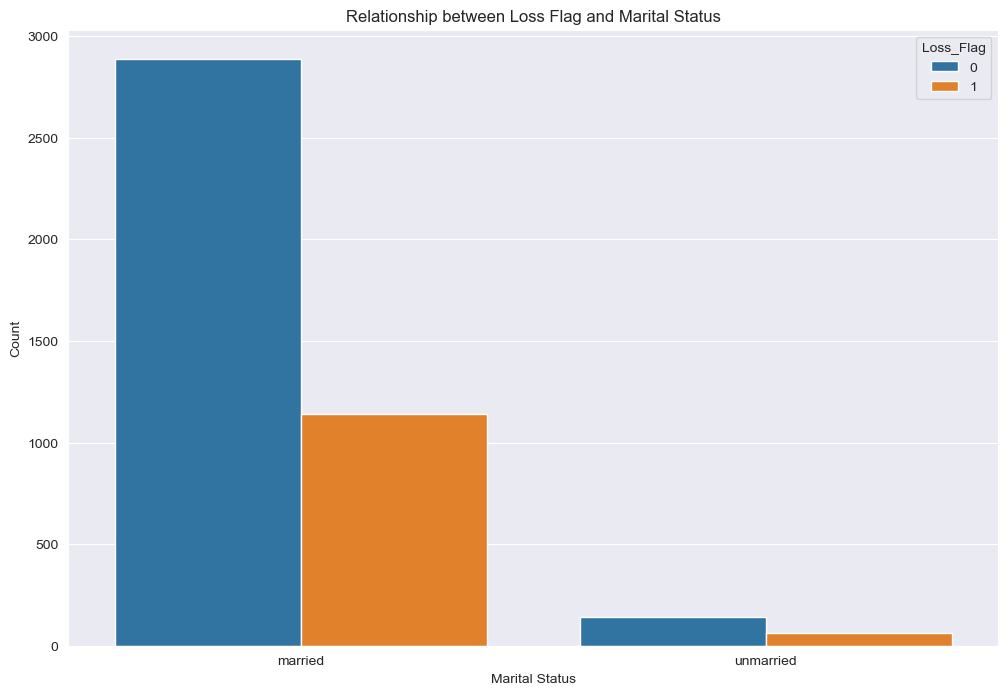

In [33]:
plt.figure(figsize=(12, 8))

sns.countplot(data=data_df, x='Marital', hue='Loss_Flag')

# Set the title and labels
plt.title('Relationship between Loss Flag and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Display the plot
plt.show()

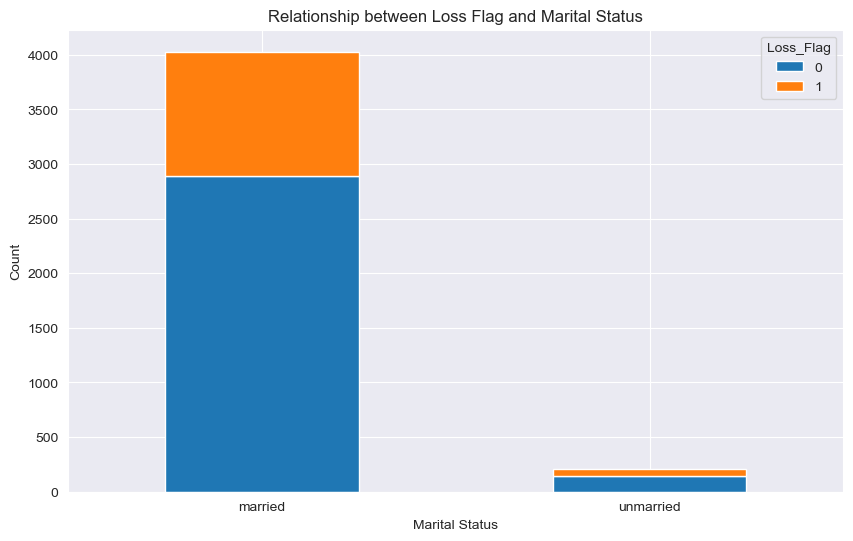

In [36]:
# Aggregate the data
marital_stacked_data = (
    data_df.groupby(['Marital', 'Loss_Flag']) # Group by marital status and loss flag
    .size()   # Count the number of each group, outputs is series
    .unstack() # Convert the series into dataframe
    .fillna(0) # Handle the null value
)

# Plot the stacked bar plot
marital_stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Relationship between Loss Flag and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.savefig('./Outputs/Loss Flag VS. Marital Status Bar Plot.png')
plt.show()

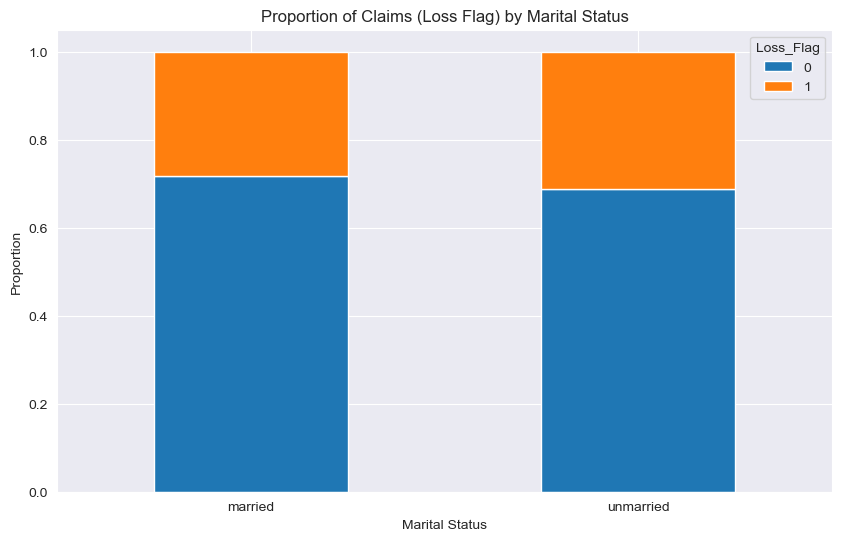

In [48]:
# Normalize the data to get proportions
Normalized_marital_stacked_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)

# Plot the normalized stacked bar plot
Normalized_marital_stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Proportion of Claims (Loss Flag) by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

# Display the plot
plt.show()

### Comparison and Insights:

- Absolute Quantity Perspective: In this dataset, the size of the married group is significantly larger than that of the unmarried group. Although most married individuals did not make a claim (`Loss_Flag` 0), there are still a considerable number of people in this group who did have claims (`Loss_Flag` 1).

- Proportional Perspective: In the married group, most individuals did not file claims, but there is also a significant proportion who did. In contrast, the unmarried group shows almost a 50/50 distribution.

# Plot the relationship between loss flag and gender
- loss flag Catagorical varialbe
- Gender: Categorical variale
- Plot Stacked Bar chart or Bar Chart

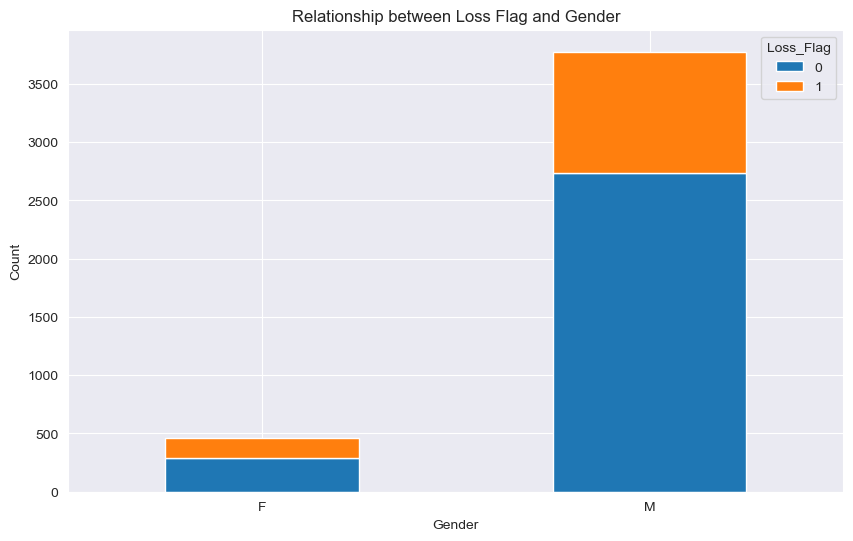

In [44]:
# Aggregate the data
gender_stacked_data = (
    data_df.groupby(['Gender', 'Loss_Flag']) # Group by gender and loss flag
    .size()   # Count the number of each group, outputs is series
    .unstack() # Convert the series into dataframe
    .fillna(0) # Handle the null value
)

# Plot the stacked bar plot
gender_stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Relationship between Loss Flag and Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.savefig('./Outputs/Loss Flag VS. Gender Bar Plot.png')
plt.show()

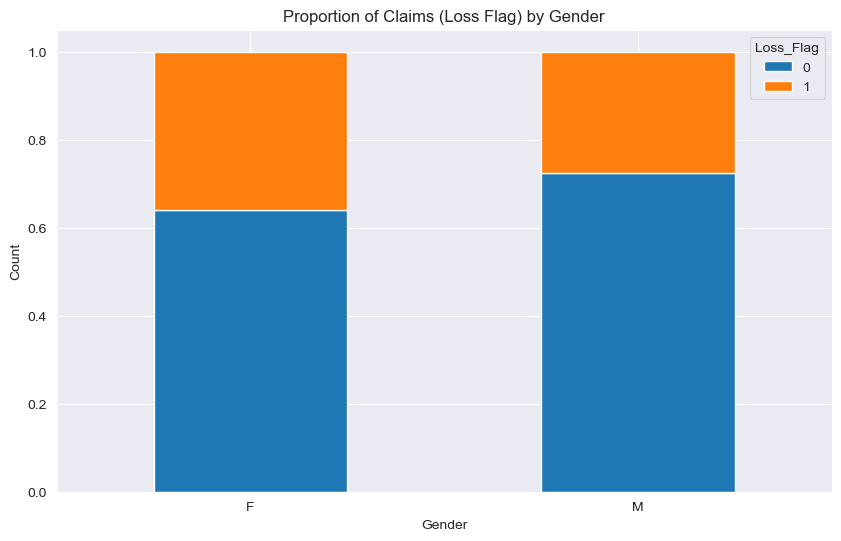

In [51]:
# Normalize the data to get proportions
Normalized_gender_stacked_data = gender_stacked_data.div(gender_stacked_data.sum(axis=1), axis=0)

# Plot the normalized stacked bar plot
Normalized_gender_stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Proportion of Claims (Loss Flag) by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Display the plot
plt.savefig('./Outputs/Loss Flag VS. Gender Bar Plot_2.png')
plt.show()

### Comparison and Insights:

• Absolute Quantity Perspective: In this dataset, the number of males is significantly greater than that of females, with a considerable number of men filing claims (`Loss_Flag` 1). Although the female group is smaller in size, it shows a similar pattern.

• Proportional Perspective: The proportional chart indicates that the likelihood of both genders filing claims (`Loss_Flag` 1) is roughly similar, with about 40% of both men and women having filed a claim.